In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"davyvi","key":"db8c7a8a477c63f62a0654bcb291e421"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d uciml/indian-liver-patient-records

indian-liver-patient-records.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/indian-liver-patient-records.zip

Archive:  /content/indian-liver-patient-records.zip
replace indian_liver_patient.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: indian_liver_patient.csv  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df['label'] = df['Dataset']
df['label']
df = df.drop(['Dataset'], axis='columns')

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
X = df.drop(['label'], axis='columns')
y = df['label']

In [ ]:
X.shape

(583, 10)

In [ ]:
import matplotlib.pyplot as plt

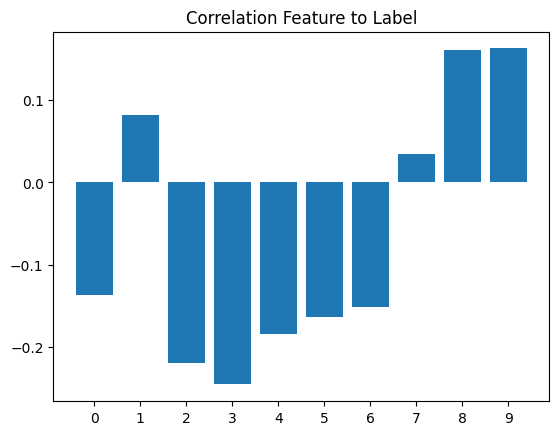

In [ ]:
plt.bar([i for i in range(10)], pd.concat([X, y], axis=1).corr().iloc[-1][:-1])
plt.title("Correlation Feature to Label")
plt.xticks(range(10))
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap="Blues")
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
import numpy as np

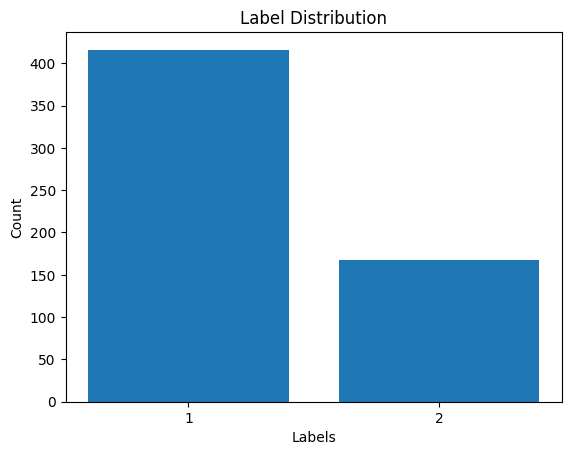

In [ ]:
unique_labels, label_counts = np.unique(df['label'], return_counts=True)

plt.bar(range(len(unique_labels)), label_counts)
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(range(len(unique_labels)), unique_labels)

plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(X))

In [ ]:
X.head()

,0,1
0,-0.805522,-0.752466
1,1.641497,0.646468
2,0.843068,0.278831
3,-0.723413,-0.401186
4,1.007421,-1.224424


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[GradientBoostingClassifier(),'Gradient Boosting Classifier'], [RandomForestClassifier(),'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [ ]:
pd.DataFrame(y_test).value_counts()

label
1        87
2        30
dtype: int64

Gradient Boosting Classifier
Accuracy :  68.37606837606837
              precision    recall  f1-score   support

           1       0.76      0.85      0.80        87
           2       0.32      0.20      0.24        30

    accuracy                           0.68       117
   macro avg       0.54      0.53      0.52       117
weighted avg       0.64      0.68      0.66       117



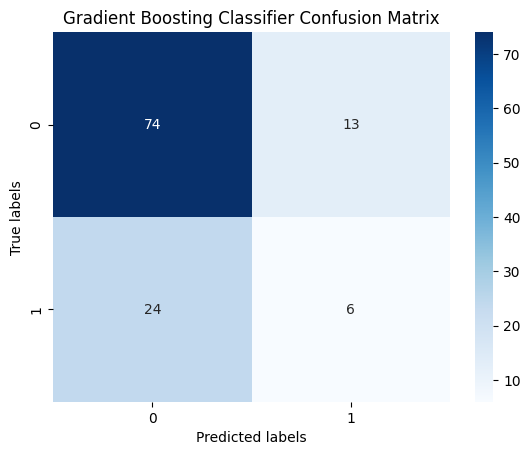

Random Forest
Accuracy :  68.37606837606837
              precision    recall  f1-score   support

           1       0.77      0.82      0.79        87
           2       0.36      0.30      0.33        30

    accuracy                           0.68       117
   macro avg       0.57      0.56      0.56       117
weighted avg       0.67      0.68      0.67       117



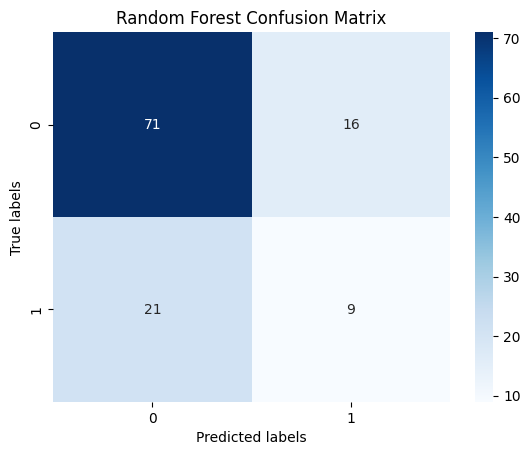

K-Nearest Neighbours
Accuracy :  74.35897435897436
              precision    recall  f1-score   support

           1       0.81      0.86      0.83        87
           2       0.50      0.40      0.44        30

    accuracy                           0.74       117
   macro avg       0.65      0.63      0.64       117
weighted avg       0.73      0.74      0.73       117



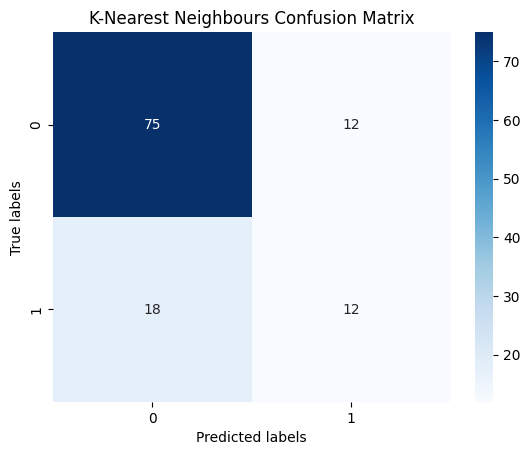

SGD Classifier
Accuracy :  64.95726495726495
              precision    recall  f1-score   support

           1       0.93      0.57      0.71        87
           2       0.41      0.87      0.56        30

    accuracy                           0.65       117
   macro avg       0.67      0.72      0.63       117
weighted avg       0.79      0.65      0.67       117



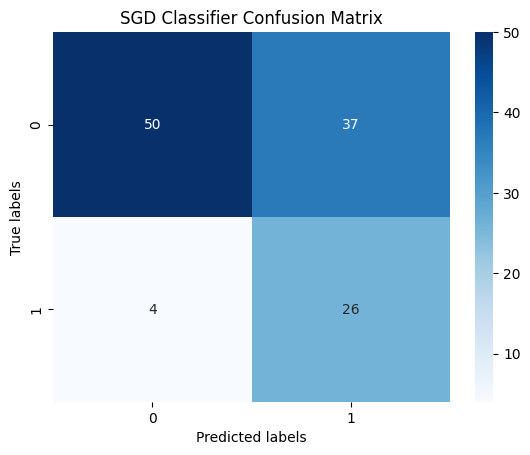

LGBM Classifier
Accuracy :  69.23076923076923
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        87
           2       0.38      0.30      0.33        30

    accuracy                           0.69       117
   macro avg       0.57      0.56      0.57       117
weighted avg       0.67      0.69      0.68       117



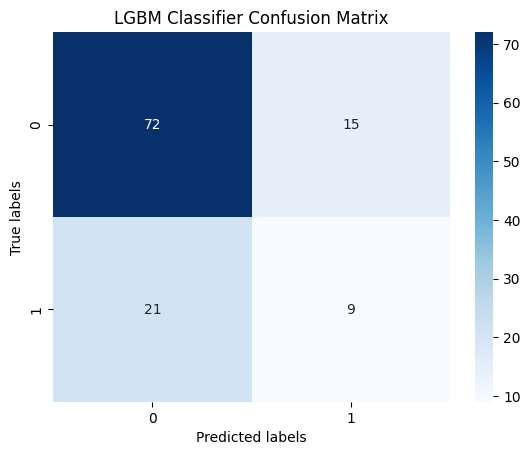

GaussianNB
Accuracy :  65.8119658119658
              precision    recall  f1-score   support

           1       0.79      0.74      0.76        87
           2       0.36      0.43      0.39        30

    accuracy                           0.66       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.68      0.66      0.67       117



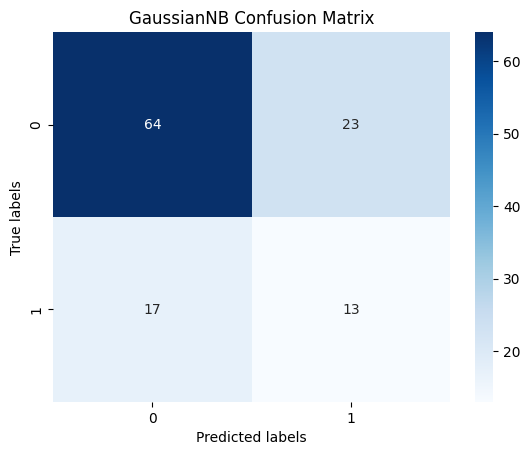

Decision Tree Classifier
Accuracy :  64.95726495726495
              precision    recall  f1-score   support

           1       0.79      0.71      0.75        87
           2       0.36      0.47      0.41        30

    accuracy                           0.65       117
   macro avg       0.58      0.59      0.58       117
weighted avg       0.68      0.65      0.66       117



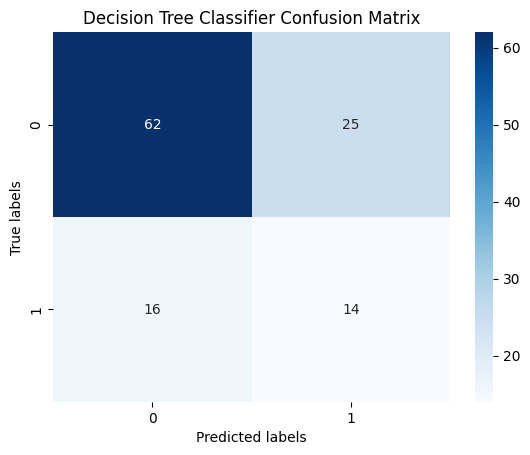

Logistic Regression
Accuracy :  72.64957264957265
              precision    recall  f1-score   support

           1       0.75      0.94      0.84        87
           2       0.38      0.10      0.16        30

    accuracy                           0.73       117
   macro avg       0.56      0.52      0.50       117
weighted avg       0.66      0.73      0.66       117



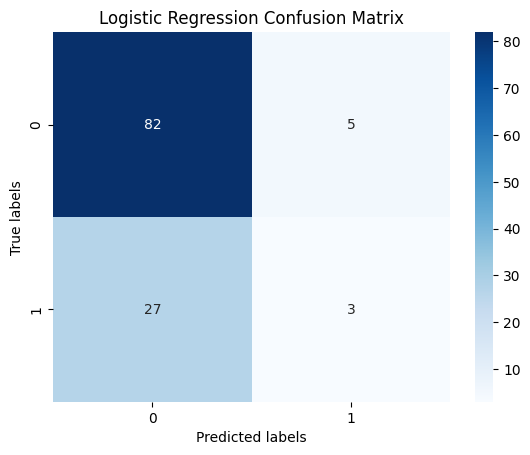

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for cls in classifiers:
    model = cls[0]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(cls[1])
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'{cls[1]} Confusion Matrix')
    plt.show()